In [1]:
#Modules.
import Functions as fun

%matplotlib inline
%pylab inline

#Plot settings.
rc('font', size = 18)
rc('lines', linewidth = 2)

myColors = plt.cm.Spectral(concatenate([arange(0,0.35,1/12.),arange(0.6,1.05,1/12.)]))

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Parameters.

sweepVc = arange(0,0.41,0.01)

In [4]:
#Read data from SweepVc-Peaks.
meanFinalDet = fun.readData('data/sweepVc-meanFinalDet')
meanProbOutDet = fun.readData('data/sweepVc-meanProbOutDet')
meanPeakDet = fun.readData('data/sweepVc-meanPeakDet')

meanFinal = fun.readData('data/sweepVc-meanFinal')
meanProbOut = fun.readData('data/sweepVc-meanProbOut')
meanPeak = fun.readData('data/sweepVc-meanPeak')

FinalSizeDeterministicDirect = fun.readData('data/sweepVcDeterministicDirect-Peak')

In [5]:
#Functions.

def giveBoundaries(y):
    boundaries = transpose([(x[24],x[499],x[975]) for x in y])
    return boundaries[0], boundaries[1], boundaries[2]


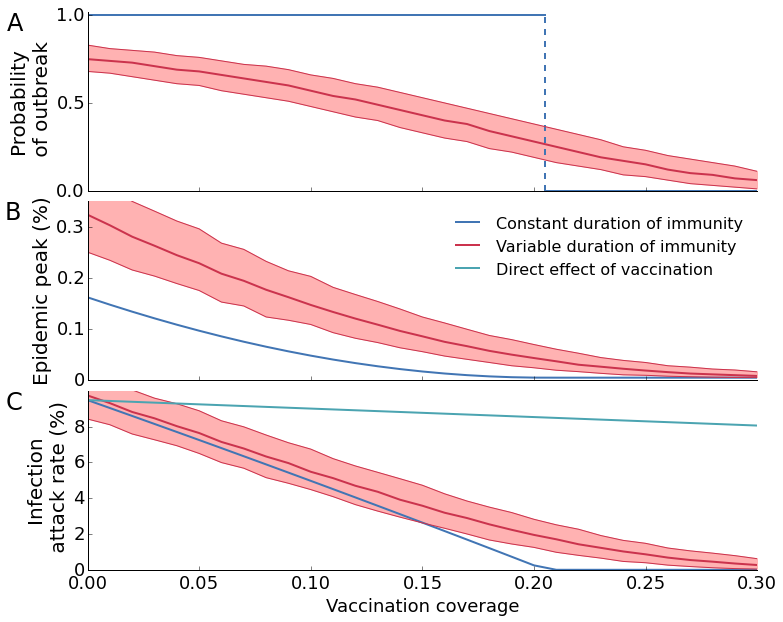

In [9]:
fig = plt.figure(figsize=(12,10))

#--------------------------------------------------------------------------
ax = fig.add_subplot(311)
text(-0.12, 0.9,'A',transform = ax.transAxes, fontsize = 24)

Vcrit = 21
ax.plot(sweepVc[:Vcrit],meanProbOutDet[:Vcrit], color=myColors[9])
ax.plot(sweepVc[Vcrit:],meanProbOutDet[Vcrit:], color=myColors[9])

xPos = sweepVc[Vcrit-1]+0.005
ax.plot([xPos,xPos],[0,1],'--', color=myColors[9])
ax.plot([xPos-0.005,xPos],[1,1], color=myColors[9])
ax.plot([xPos,xPos+0.005],[0,0], color=myColors[9])

lower, median, upper = giveBoundaries(meanProbOut)
ax.plot(sweepVc, median, linewidth=2,color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.3])
ax.set_xticklabels([])

ax.set_ylim([0,1.02])
ax.set_yticks([0,0.5,1])

ax.set_ylabel('Probability\n of outbreak', fontsize = 20)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(312)
text(-0.12, 0.9,'B',transform = ax.transAxes, fontsize = 24)

ax.plot(sweepVc,meanPeakDet, linewidth=2, color=myColors[9])

lower, median, upper = giveBoundaries(meanPeak)
ax.plot(sweepVc, median, linewidth=2,color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])

ax.set_xlim([0,0.3])
ax.set_xticklabels([])

ax.set_ylim([0,0.0035])
ax.set_yticks([0,0.001,0.002,0.003])
ax.set_yticklabels([0,0.1,0.2,0.3])

ax.set_ylabel('Epidemic peak (%)', fontsize = 20)

#Dummy plot legend.
ax.plot(-1,-1, linewidth=2, color=myColors[9],label='Constant duration of immunity')
ax.plot(-1, -1, linewidth=2,color=myColors[1],label='Variable duration of immunity')
ax.plot(-1, -1, linewidth=2, color=myColors[8],label='Direct effect of vaccination')
ax.legend(fontsize = 16, frameon = False)

fun.removeFrame(ax)

#--------------------------------------------------------------------------
ax = fig.add_subplot(313)
text(-0.12, 0.9,'C',transform = ax.transAxes, fontsize = 24)

ax.plot(sweepVc,meanFinalDet, linewidth=2, color=myColors[9])

lower, median, upper = giveBoundaries(meanFinal)
ax.plot(sweepVc, median, linewidth=2,color=myColors[1])
ax.plot(sweepVc,lower, sweepVc, upper, linewidth=1,color=myColors[1])
ax.fill_between(sweepVc, lower, upper, color=[255/255.,178/255.,178/255.])

ax.plot(sweepVc,FinalSizeDeterministicDirect, linewidth=2, color=myColors[8])

ax.set_xlim([0,0.3])
ax.set_ylim([0,0.1])

ax.set_yticks([0,0.02,0.04,0.06,0.08])
ax.set_yticklabels(['0','2','4','6','8'])

ax.set_xlabel('Vaccination coverage')
ax.set_ylabel('Infection\n attack rate (%)', fontsize = 20)

fun.removeFrame(ax)


subplots_adjust(hspace = 0.06)

show()

#Save figure.
if True:
    fig.savefig('figures/sweepVc.eps')
    fig.savefig('figures/sweepVc.png')

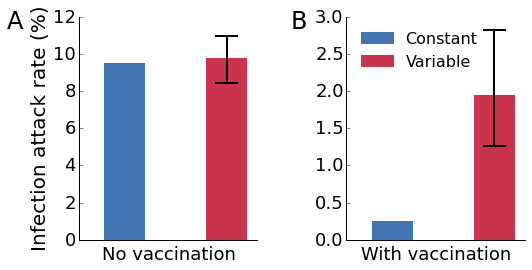

In [18]:
#Plotting attack rates with/without vaccination in bar plots.

def plotBars(ax,finalDet,finalStoch):
    ax.add_patch(Rectangle((0,0), 0.4, 100*finalDet, facecolor = myColors[9], lw = 0))

    lower, median, upper = giveBoundaries(finalStoch)
    
    ax.add_patch(Rectangle((1,0), 0.4, 100*median, facecolor = myColors[1], lw = 0))
    
    #Errorbars.
    ax.plot([1.1,1.3],[100*lower,100*lower], linewidth=2, color = 'black')
    ax.plot([1.1,1.3],[100*upper,100*upper], linewidth=2, color = 'black')
    ax.plot([1.2,1.2],[100*lower,100*upper], linewidth=2, color = 'black')

    ax.set_xlim([-.25,1.5])
    ax.set_xticks([])

    fun.removeFrame(ax)


    
fig = plt.figure(figsize=(8,4))
axes = [fig.add_subplot(121),fig.add_subplot(122)]

#No vaccination bars.
plotBars(axes[0],meanFinalDet[0],meanFinal[0:1])

#At 20% coverage.
plotBars(axes[1],meanFinalDet[20],meanFinal[20:21])


axes[0].set_xlabel('No vaccination')
axes[1].set_xlabel('With vaccination')
axes[0].set_ylabel('Infection attack rate (%)', fontsize = 20)

text(-0.4, 0.95,'A',transform = axes[0].transAxes, fontsize = 24)
text(-0.3, 0.95,'B',transform = axes[1].transAxes, fontsize = 24)

#Plot legend.
patchDet = matplotlib.patches.Patch(color=myColors[9], label = 'Constant')
patchStoch = matplotlib.patches.Patch(color=myColors[1], label = 'Variable')
plt.legend(handles=[patchDet,patchStoch], loc = 2, fontsize = 16, frameon = False)

subplots_adjust(wspace = 0.5)
    
#Save figure.
if True:
    fig.savefig('figures/attackrates.eps')
    fig.savefig('figures/attackrates.png')